In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
#since pixel ranges from 0 to 255
# we must standardize it

X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
y_train[0]

5

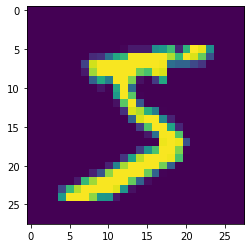

In [12]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [51]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9969 - accuracy: 0.7091 - val_loss: 0.5158 - val_accuracy: 0.8469
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4642 - accuracy: 0.8633 - val_loss: 0.3941 - val_accuracy: 0.8863
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3854 - accuracy: 0.8880 - val_loss: 0.3380 - val_accuracy: 0.9024
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.9001 - val_loss: 0.3134 - val_accuracy: 0.9096
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3199 - accuracy: 0.9072 - val_loss: 0.2948 - val_accuracy: 0.9158
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.9141 - val_loss: 0.2737 - val_accuracy: 0.9202
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.9203 - val_loss: 0.2481 - val_accuracy:

In [63]:
history.history

{'loss': [0.9968854784965515,
  0.46420612931251526,
  0.38541075587272644,
  0.34680256247520447,
  0.31990641355514526,
  0.2953552305698395,
  0.27397066354751587,
  0.2549740970134735,
  0.23714503645896912,
  0.2221207469701767],
 'accuracy': [0.7091041803359985,
  0.8633333444595337,
  0.8880000114440918,
  0.9001041650772095,
  0.9072083234786987,
  0.914104163646698,
  0.9202708601951599,
  0.926520824432373,
  0.9308958053588867,
  0.934499979019165],
 'val_loss': [0.5158485770225525,
  0.39413633942604065,
  0.33796218037605286,
  0.3134431838989258,
  0.29479822516441345,
  0.2736956477165222,
  0.24808980524539948,
  0.24004574120044708,
  0.2226666659116745,
  0.2118564397096634],
 'val_accuracy': [0.846916675567627,
  0.8862500190734863,
  0.9024166464805603,
  0.909583330154419,
  0.9157500267028809,
  0.9201666712760925,
  0.9289166927337646,
  0.9316666722297668,
  0.9356666803359985,
  0.937833309173584]}

In [55]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [56]:
y_pred = y_prob.argmax(axis = 1)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8898

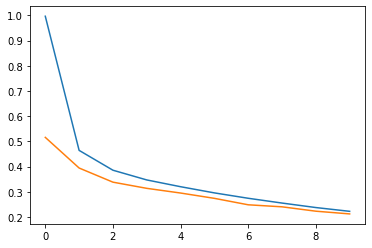

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

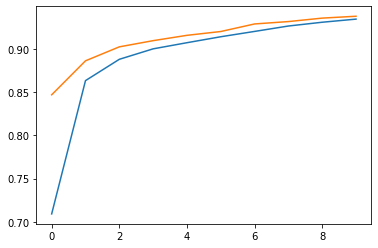

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [60]:
model.predict(X_test[0])
model.predict(X_test[1]).argmax(axis = 1)


1/1 [==============================] - 0s 19ms/step


array([2])

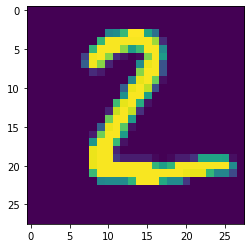

In [61]:
plt.imshow(X_test[1])

In [62]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 18ms/step


array([2])